In [6]:
#Light Yield Dataframe Analyzer 
import UsefulFunctions as uf
import pandas as pd
import pickle

In [7]:
#Name of Dataframe, do not include .pkl.
DataframeName='Aug222023SourceUCRStrip3point5V'

#What channel are you analyzing
channel='2'

#querylimit='14.475'#in mV
querylimit=40

channelquery='ch%s_P2P_smooth>%s and ch%s_P2P_smooth<950'%(channel,querylimit,channel)
channeleval='ch%s_P2P_smooth'%(channel)

#print(channeleval)

In [8]:
#read the dataframe from the output pkl file
with open(f'{DataframeName}.pkl', 'rb') as f:
    fout = pickle.load(f)

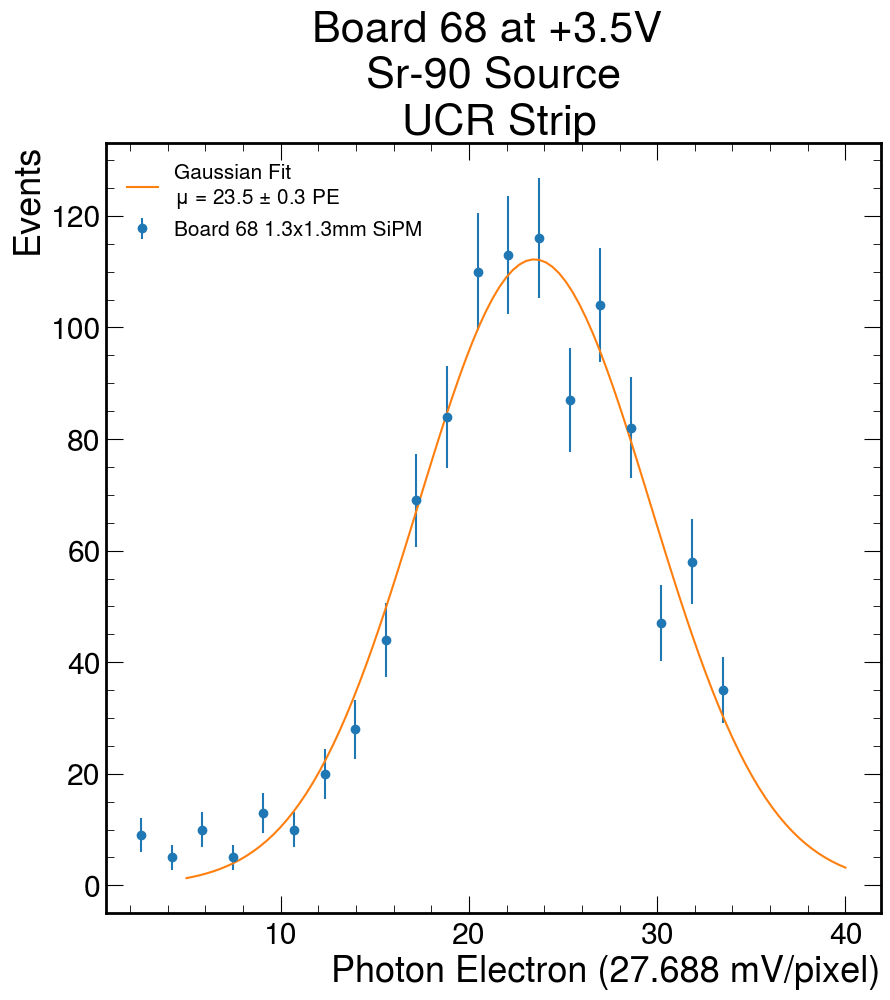

In [9]:
import matplotlib.pyplot as plt
import mplhep as hep
from scipy.optimize import curve_fit
import numpy as np
hep.style.use("CMS")


def gauss(x, A, mu, sigma):
    return A*np.exp(-(x-mu)**2/(2.*sigma**2))


events=len(fout)
#Name your plot.finger spectrum
#title=f'Board 68 at +2 \nCosmic Rays\nUCR Strip\nEvents: {events}'
title=f'Board 68 at +3.5V \nSr-90 Source\n UCR Strip'

plt.figure(figsize=(6,10))
#PE = 14.475 #Pixel Calibration mV/Pixel
PE=27.688

#Change when using source VVVVV
#hist = plt.hist(fout.query(channelquery).eval(channeleval)/PE,bins=int(np.sqrt(len(fout))))
hist = plt.hist(fout.query(channelquery).eval(channeleval)/PE,bins=20)

bin_centers = (hist[1][1:]+hist[1][:-1])/2
plt.close()

plt.errorbar(bin_centers,hist[0],np.sqrt(hist[0]),label="Board 68 1.3x1.3mm SiPM",fmt='o')
coeff, covar = curve_fit(gauss, bin_centers, hist[0], p0=(50,300/PE,100/PE),maxfev=80000)

#plt.plot(np.linspace(0,150/PE,100),gauss(np.linspace(0,150/PE,100),*coeff),label=f"Gaussian Fit\n$\mu$ = {coeff[1]:.2f} $\pm$ {np.sqrt(covar[1][1]):.2f} PE")
plt.plot(np.linspace(5,40,100),gauss(np.linspace(5,40,100),*coeff),label=f"Gaussian Fit\n$\mu$ = {coeff[1]:.1f} $\pm$ {np.sqrt(covar[1][1]):.1f} PE")

plt.xlabel(f"Photon Electron ({PE} mV/pixel)")
#plt.xlabel("mV")
#plt.xlim(0,60)
plt.ylabel("Events")
plt.legend(fontsize=15,loc='upper left')
plt.title(title)
plt.savefig(DataframeName)
plt.show()



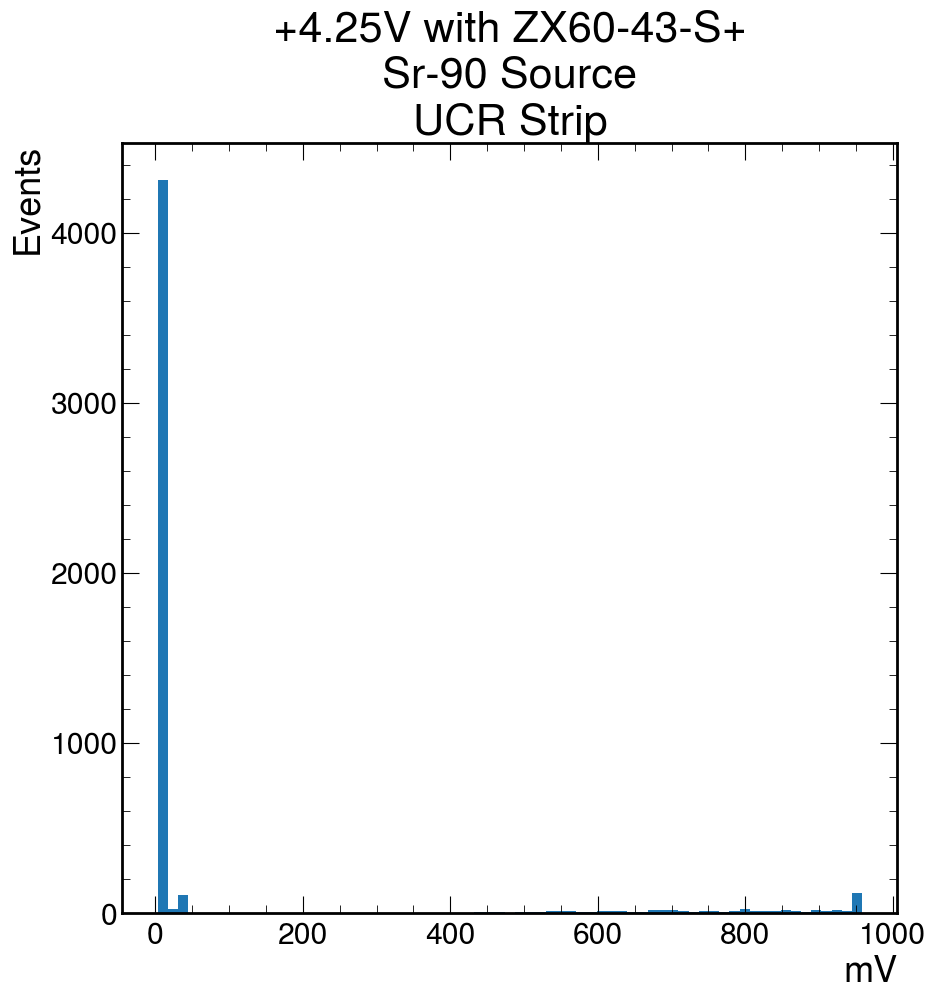

In [6]:
#------------------------------------------------------------------------------------------

#plt.hist(fout[channeleval]/PE,bins=int(np.sqrt(len(fout))),alpha=0.5,density=False)

#plt.title(title)
#plt.xlabel('Photoelectrons')
#plt.ylabel('Counts')
#plt.ylim([0, 0.030])
#plt.show

##########################################################
bins=69

title="+4.25V with ZX60-43-S+\nSr-90 Source\nUCR Strip"

ylist,xlist,_=plt.hist(fout[channeleval]/PE,bins)
plt.title(title)
#plt.xlabel(f"Photon Electron ({PE} mV/pixel)")
plt.xlabel("mV")
plt.ylabel("Events")
#plt.xlim(0,1000)
#plt.ylim(0,50)
#plt.close()
x=np.array(xlist)
y=np.array(ylist)

x=np.delete(x,-1)

arr=np.empty((0,2))

for i in range(len(x)):
    values=np.array([[x[i],y[i]]])
    arr=np.append(arr,values,axis=0)

file='HistogramArrayData2'

np.save(file, arr, allow_pickle=True, fix_imports=False)

In [ ]:
######################################################################################################################################################################################
#VVVVVVVVVVVVVVVVVVVVV                         SEPERATE NEW CODE BELOW         VVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVvvvv
#
######################################################################################################################################################################################

In [1]:
#Comparison of two Dataframe plots.
import UsefulFunctions as uf
import pandas as pd
import pickle

In [2]:
#Name of Dataframe, do not include .pkl.
DataframeName1='Aug172023VoltageSweep2V_5V_1'
DataframeName2='Aug172023VoltageSweep2V_5V_2'
DataframeName3='Aug222023SourceUCRStrip3point5V'
DataframeName4='Aug212023SourceUCRStrip4V'

#What channel are you analyzing for the first dataframe
DF1channel='2'
DF1querylimit='30'#in mV, cuts out the noise spike 

DF1channelquery='ch%s_P2P_smooth>%s'%(DF1channel,DF1querylimit)
DF1channeleval='ch%s_P2P_smooth'%(DF1channel)

#What channel are you analyzing for the second dataframe
DF2channel='2'
DF2querylimit='30'#in mV, cuts out the noise spike

DF2channelquery='ch%s_P2P_smooth>%s'%(DF2channel,DF2querylimit)
DF2channeleval='ch%s_P2P_smooth'%(DF2channel)

#########################
DF3channel='2'
DF3querylimit='40'#in mV, cuts out the noise spike

DF3channelquery='ch%s_P2P_smooth>%s and ch%s_P2P_smooth<950'%(DF3channel,DF3querylimit,DF3channel)
DF3channeleval='ch%s_P2P_smooth'%(DF3channel)
#########################
DF4channel='2'
DF4querylimit='40'#in mV, cuts out the noise spike

DF4channelquery='ch%s_P2P_smooth>%s and ch%s_P2P_smooth<950'%(DF4channel,DF4querylimit,DF4channel)
#DF4channelquery='ch%s_P2P_smooth>%s'%(DF4channel,DF4querylimit)
DF4channeleval='ch%s_P2P_smooth'%(DF4channel)
#print(DF4channelquery)




#print(channeleval)

In [3]:
#read the dataframe from the output pkl file
with open(f'{DataframeName1}.pkl', 'rb') as f:
    fout1 = pickle.load(f)

with open(f'{DataframeName2}.pkl', 'rb') as f:
    fout2 = pickle.load(f)
    
with open(f'{DataframeName3}.pkl', 'rb') as f:
    fout3 = pickle.load(f)

with open(f'{DataframeName4}.pkl', 'rb') as f:
    fout4 = pickle.load(f)


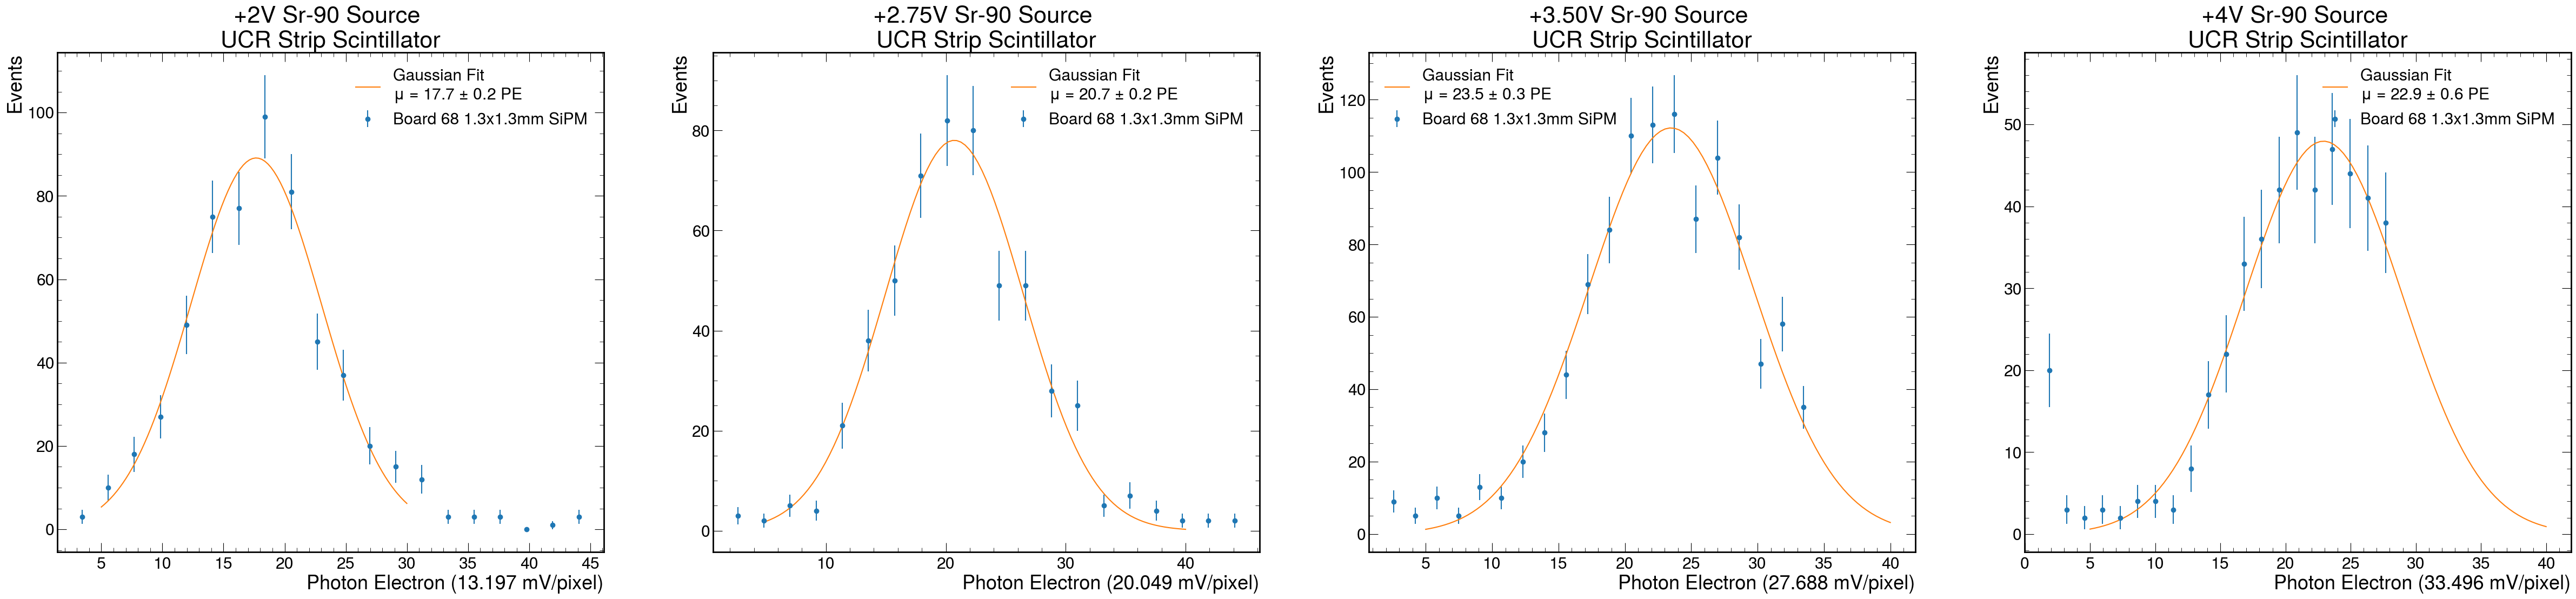

In [4]:
import matplotlib.pyplot as plt
import mplhep as hep
from scipy.optimize import curve_fit
import numpy as np
hep.style.use("CMS")

def gauss(x, A, mu, sigma):
    return A*np.exp(-(x-mu)**2/(2.*sigma**2))


fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize=(60,12))

plt.figure(figsize=(6,10))

PE1 =13.197 #Pixel Calibration mV/Pixel for the first dataframe
PE2 =20.049 #Pixel Calibration mV/Pixel for the second dataframe
PE3 =27.688
PE4 =33.496
#Change when using source VVVVV

#hist1 = plt.hist(fout1.query(DF1channelquery).eval(DF1channeleval)/PE1,bins=int(np.sqrt(len(fout1))))
hist1 = plt.hist(fout1.query(DF1channelquery).eval(DF1channeleval)/PE1,bins=20)
bin_centers1 = (hist1[1][1:]+hist1[1][:-1])/2
#plt.close()


ax1.errorbar(bin_centers1,hist1[0],np.sqrt(hist1[0]),label="Board 68 1.3x1.3mm SiPM",fmt='o')
coeff1, covar1 = curve_fit(gauss, bin_centers1, hist1[0], p0=(50,300/PE1,100/PE1),maxfev=80000)

#plt.subplot(1,1,1)
ax1.plot(np.linspace(5,30,100),gauss(np.linspace(5,30,100),*coeff1),label=f"Gaussian Fit\n$\mu$ = {coeff1[1]:.1f} $\pm$ {np.sqrt(covar1[1][1]):.1f} PE")
ax1.set_xlabel(f"Photon Electron ({PE1} mV/pixel)")
ax1.set_ylabel("Events")
#ax1.set_xlim(0,80)
#ax1.set_ylim(0,39)
ax1.legend()
ax1.set_title("+2V Sr-90 Source \nUCR Strip Scintillator")

#---------------------------------------------------------------------------------------------------------------------------------------------------------------------

#hist2 = plt.hist(fout2.query(DF2channelquery).eval(DF2channeleval)/PE2,bins=int(np.sqrt(len(fout2))))
hist2 = plt.hist(fout2.query(DF2channelquery).eval(DF2channeleval)/PE2,bins=20)
bin_centers2 = (hist2[1][1:]+hist2[1][:-1])/2
#plt.close()

ax2.errorbar(bin_centers2,hist2[0],np.sqrt(hist2[0]),label="Board 68 1.3x1.3mm SiPM",fmt='o')
coeff2, covar2 = curve_fit(gauss, bin_centers2, hist2[0], p0=(50,300/PE2,100/PE2),maxfev=80000)

ax2.plot(np.linspace(5,40,100),gauss(np.linspace(5,40,100),*coeff2),label=f"Gaussian Fit\n$\mu$ = {coeff2[1]:.1f} $\pm$ {np.sqrt(covar2[1][1]):.1f} PE")
ax2.set_xlabel(f"Photon Electron ({PE2} mV/pixel)")
ax2.set_ylabel("Events")
#ax2.set_xlim(0,80)
#ax2.set_ylim(0,39)
ax2.legend()
ax2.set_title("+2.75V Sr-90 Source \nUCR Strip Scintillator")

################

#hist3 = plt.hist(fout3.query(DF3channelquery).eval(DF3channeleval)/PE3,bins=int(np.sqrt(len(fout3))))
hist3 = plt.hist(fout3.query(DF3channelquery).eval(DF3channeleval)/PE3,bins=20)
bin_centers3 = (hist3[1][1:]+hist3[1][:-1])/2
#plt.close()

ax3.errorbar(bin_centers3,hist3[0],np.sqrt(hist3[0]),label="Board 68 1.3x1.3mm SiPM",fmt='o')
coeff3, covar3 = curve_fit(gauss, bin_centers3, hist3[0], p0=(50,300/PE3,100/PE3),maxfev=80000)

ax3.plot(np.linspace(5,40,100),gauss(np.linspace(5,40,100),*coeff3),label=f"Gaussian Fit\n$\mu$ = {coeff3[1]:.1f} $\pm$ {np.sqrt(covar3[1][1]):.1f} PE")
ax3.set_xlabel(f"Photon Electron ({PE3} mV/pixel)")
ax3.set_ylabel("Events")
#ax3.set_xlim(0,80)
#ax3.set_ylim(0,39)
ax3.legend()
ax3.set_title("+3.50V Sr-90 Source \nUCR Strip Scintillator")
# ################

#hist4 = plt.hist(fout4.query(DF4channelquery).eval(DF4channeleval)/PE4,bins=int(np.sqrt(len(fout4))))

hist4 = plt.hist(fout4.query(DF4channelquery).eval(DF4channeleval)/PE4,bins=20)
bin_centers4 = (hist4[1][1:]+hist4[1][:-1])/2
plt.close()

ax4.errorbar(bin_centers4,hist4[0],np.sqrt(hist4[0]),label="Board 68 1.3x1.3mm SiPM",fmt='o')
coeff4, covar4 = curve_fit(gauss, bin_centers4, hist4[0], p0=(50,300/PE4,100/PE4),maxfev=80000)

ax4.plot(np.linspace(5,40,100),gauss(np.linspace(5,40,100),*coeff4),label=f"Gaussian Fit\n$\mu$ = {coeff4[1]:.1f} $\pm$ {np.sqrt(covar4[1][1]):.1f} PE")
ax4.set_xlabel(f"Photon Electron ({PE4} mV/pixel)")
ax4.set_ylabel("Events")
#ax4.set_xlim(0,80)
#ax4.set_ylim(0,39)
ax4.legend()
ax4.set_title("+4V Sr-90 Source \nUCR Strip Scintillator")


plt.savefig('voltagesweep')
plt.show()









[0.22830746 0.2472707  0.27280667 0.55510864]


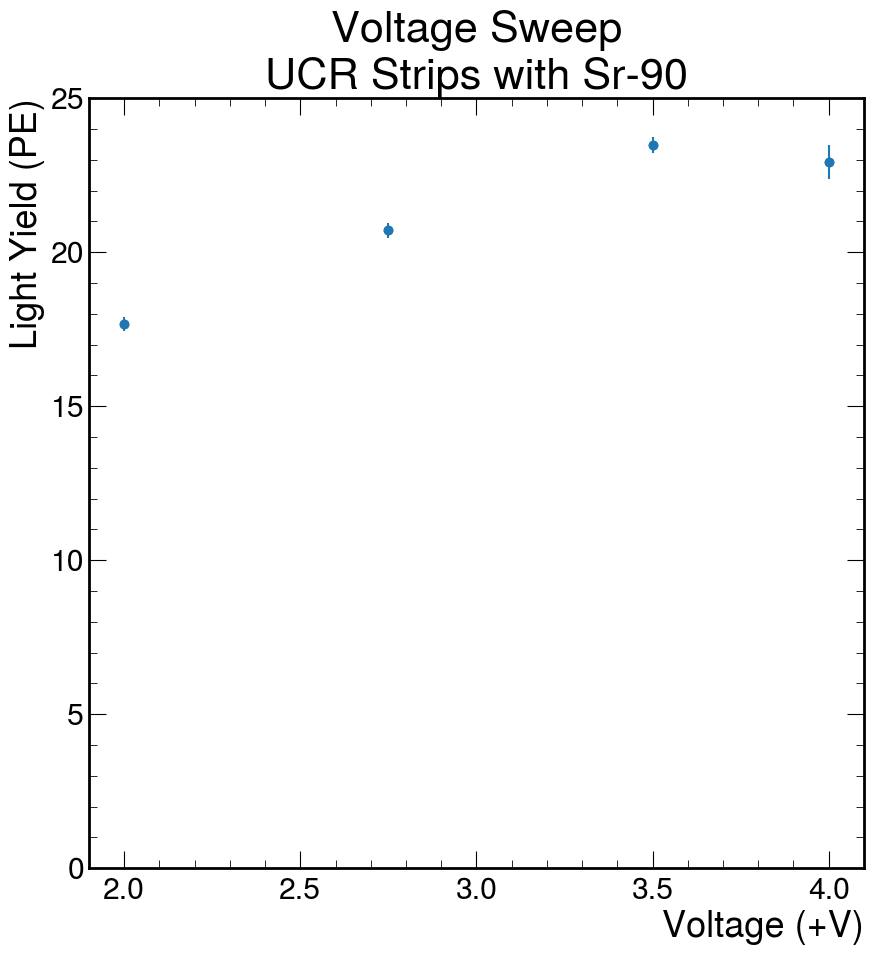

In [10]:
import matplotlib.pyplot as plt
import numpy as np
    
y = np.array([coeff1[1],coeff2[1],coeff3[1],coeff4[1]])
x = np.array([2,2.75,3.50,4])

#Error Bars
c=np.array([np.sqrt(covar1[1][1]),np.sqrt(covar2[1][1]),np.sqrt(covar3[1][1]),np.sqrt(covar4[1][1])])
print(c)

a, b = np.polyfit(x, y, 1)
plt.scatter(x, y)
plt.errorbar(x,y,yerr=c,fmt='o')
#plt.plot(x, a*x+b)
plt.title('Voltage Sweep\nUCR Strips with Sr-90')
plt.ylabel('Light Yield (PE)')
plt.xlabel('Voltage (+V)')
#plt.xlim(0,6)
plt.ylim(0,25)
plt.show()
